Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler


In [9]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Features for Clustering
# Only Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

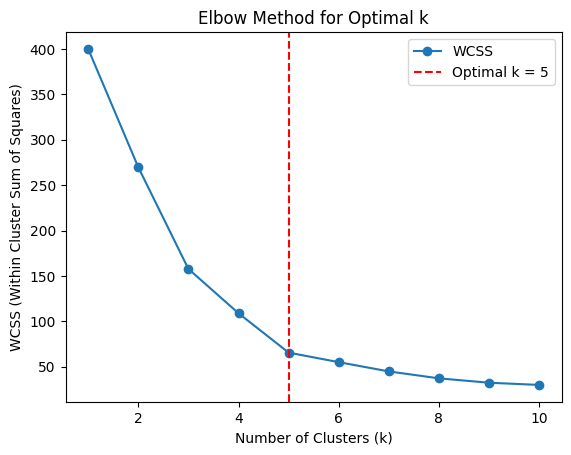

In [ ]:
#Elbow Method to find Optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS curve
plt.plot(range(1, 11), wcss, marker='o', label="WCSS")

# Suppose optimal k is 5 (you can change this based on elbow)
optimal_k = 5
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")

plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()


In [17]:
#Apply KMeans with chosen clusters (suppose k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

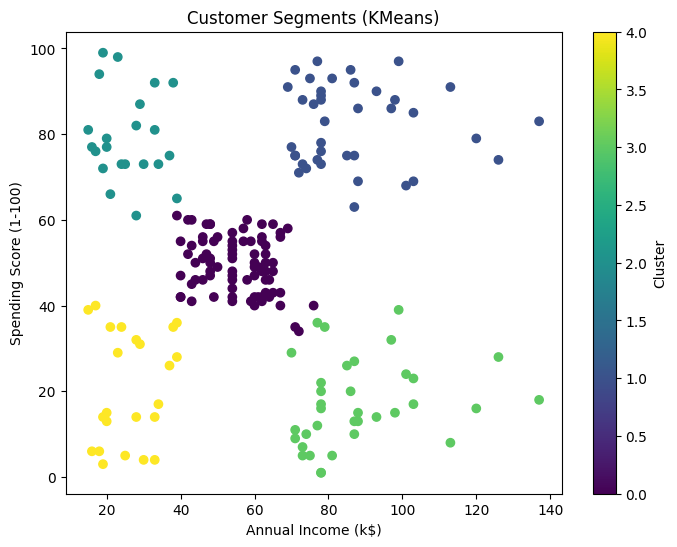

In [18]:
#Visualize KMeans Clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (KMeans)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
#Analyze Average Spending & Income per Cluster
print("Average values per cluster:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
df.head()
'''

High income & high spending → Cluster 1 (Big Spenders)

Low income & high spending → Cluster 2 (Carefree Spenders)

Low income & low spending → Cluster 4 (Budget Conscious)

High income & low spending → Cluster 3 (Savers)

Average income & average spending → Cluster 0 (Average Spenders)'''

Average values per cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [23]:
# -------------------------------
# Step 9: Predict Cluster for New Customer
# -------------------------------

# Map clusters to segment names (based on your previous analysis)
segment_names = {
    0: 'Average Spenders',
    1: 'Big Spenders',
    2: 'Carefree Spenders',
    3: 'Savers',
    4: 'Budget Conscious'
}

# Take input from user
income = float(input("Enter Annual Income (k$): "))
spending = float(input("Enter Spending Score (1-100): "))

# Create dataframe for new customer
new_customer = pd.DataFrame([[income, spending]], columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Scale the input using same scaler
new_customer_scaled = scaler.transform(new_customer)

# Predict cluster
cluster_pred = kmeans.predict(new_customer_scaled)[0]

# Get segment name
segment = segment_names[cluster_pred]

print(f"\nThe customer belongs to Cluster {cluster_pred} → Segment: {segment}")



The customer belongs to Cluster 0 → Segment: Average Spenders


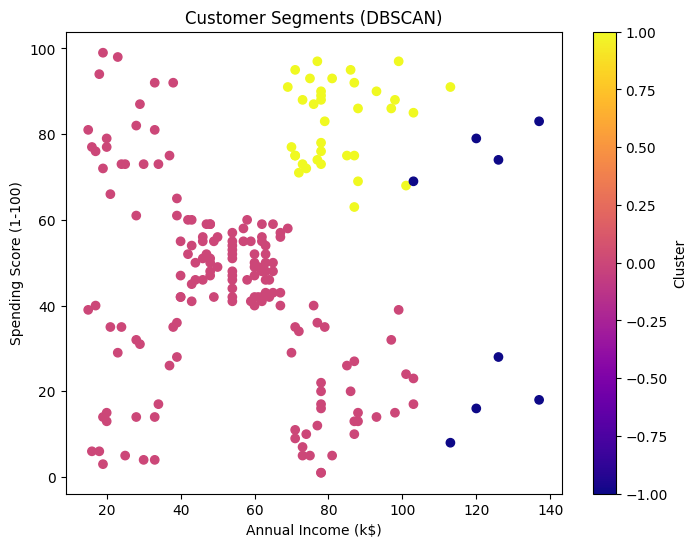

DBSCAN Cluster counts:
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


In [24]:
#Step 9 (Extra): Try DBSCAN Clustering
# -------------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='plasma')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (DBSCAN)")
plt.colorbar(label="Cluster")
plt.show()

print("DBSCAN Cluster counts:")
print(df['DBSCAN_Cluster'].value_counts())

In [25]:
from sklearn.metrics import silhouette_score

# KMeans silhouette
kmeans_labels = df['Cluster']
kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_sil:.3f}")

# DBSCAN silhouette (ignore noise points labeled -1)
dbscan_labels = df['DBSCAN_Cluster']
mask = dbscan_labels != -1
if sum(mask) > 1:
    dbscan_sil = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score: {dbscan_sil:.3f}")
else:
    print("DBSCAN too few clusters to compute silhouette score")


KMeans Silhouette Score: 0.555
DBSCAN Silhouette Score: 0.388
